In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from data_utils import generate_ground_truth_matrix, ground_truth_matrix_to_dataset, correlation
import reclab

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999999999998, 1.0, 0.9999999999999998, 1.0]


/var/folders/p2/v6y91c591nq_2q129bwd64bc0000gn/T/ipykernel_6164/4046154162.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


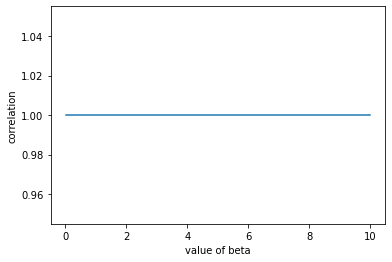

In [4]:
# Beta vs Pearson correlation

# np.random.seed(0)

def correlation_train(beta, correlation_metric):
    truth = generate_ground_truth_matrix(
        (1000, 1000), environment='latent-dynamic-v1')
    users, items, ratings, P, R = ground_truth_matrix_to_dataset(
        truth, quantization='onetofive', bias='full underlying', beta=beta)
    return correlation(P, truth, correlation_metric)


beta = np.linspace(0.01, 10, 10)
pearson = [correlation_train(i, 'spearman') for i in beta]
print(pearson)
fig1, ax = plt.subplots()
ax.plot(beta, pearson)
ax.set(xlabel='value of beta', ylabel='correlation')
fig1.show()
